In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos de Alemania:

## 1) Datos

### 1.1)Carga

In [60]:
# Oscar
#file_path = r'C:\Users\oscar\OneDrive - Universidad Nacional de Colombia\Universidad-Fisica\Introduccion a la investigacion teorica\Dinamica viral\Aktuell_Deutschland_SarsCov2_Infektionen.txt'

#Sebastian
file_path = r"../../Descargas/Aktuell_Deutschland_SarsCov2_Infektionen.csv"



# Read the data from the text file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's been read correctly
data.head()

,IdLandkreis,Altersgruppe,Geschlecht,Meldedatum,Refdatum,IstErkrankungsbeginn,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlFall,AnzahlTodesfall,AnzahlGenesen
0,1001,A15-A34,M,2020-10-28,2020-01-19,1,0,-9,0,1,0,1
1,1001,A15-A34,M,2020-03-19,2020-03-13,1,0,-9,0,1,0,1
2,1001,A15-A34,M,2020-03-21,2020-03-13,1,0,-9,0,1,0,1
3,1001,A15-A34,M,2020-03-19,2020-03-16,1,0,-9,0,1,0,1
4,1001,A15-A34,M,2020-03-14,2020-03-16,1,0,-9,0,1,0,1


### 1.2) Rename

In [61]:
#Data for the period from March 1 to July 1, 2021. Se muestra un único grupo de casos por fila
column_names=['Distrito de identificación', 'Grupo de edad', 'Género', 'Fecha de informe', 'Fecha de referencia','Es el comienzo de la enfermedad?', 'Nuevo caso', 'Muerte nueva', 'Recuperación nueva', 'Número de casos', 'Número de muertes', 'Número de recuperaciones']
data = data.rename(columns=dict(zip(data.columns, column_names)))
data.head()


,Distrito de identificación,Grupo de edad,Género,Fecha de informe,Fecha de referencia,Es el comienzo de la enfermedad?,Nuevo caso,Muerte nueva,Recuperación nueva,Número de casos,Número de muertes,Número de recuperaciones
0,1001,A15-A34,M,2020-10-28,2020-01-19,1,0,-9,0,1,0,1
1,1001,A15-A34,M,2020-03-19,2020-03-13,1,0,-9,0,1,0,1
2,1001,A15-A34,M,2020-03-21,2020-03-13,1,0,-9,0,1,0,1
3,1001,A15-A34,M,2020-03-19,2020-03-16,1,0,-9,0,1,0,1
4,1001,A15-A34,M,2020-03-14,2020-03-16,1,0,-9,0,1,0,1


In [62]:
data['Fecha de referencia'] = pd.to_datetime(data['Fecha de referencia'])
data['Fecha de informe'] = pd.to_datetime(data['Fecha de informe'])
data = data.sort_values('Fecha de referencia')

In [63]:
data.head(22)

,Distrito de identificación,Grupo de edad,Género,Fecha de informe,Fecha de referencia,Es el comienzo de la enfermedad?,Nuevo caso,Muerte nueva,Recuperación nueva,Número de casos,Número de muertes,Número de recuperaciones
6858817,14628,A15-A34,W,2022-01-04,2020-01-01,1,0,-9,0,1,0,1
6299812,12064,A35-A59,M,2021-01-06,2020-01-01,1,0,-9,0,1,0,1
5900976,11003,A15-A34,M,2021-01-13,2020-01-01,1,0,-9,0,1,0,1
5486293,9761,A35-A59,M,2021-01-07,2020-01-01,1,0,-9,0,1,0,1
6810773,14626,A35-A59,W,2021-01-05,2020-01-01,1,0,-9,0,1,0,1
122149,1056,A35-A59,W,2021-01-04,2020-01-01,1,0,-9,0,1,0,1
2977992,7134,A60-A79,W,2021-01-03,2020-01-01,1,0,-9,0,1,0,1
25251,1002,A35-A59,W,2021-01-07,2020-01-01,1,0,-9,0,1,0,1
5048238,9475,A15-A34,W,2020-12-09,2020-01-01,1,0,-9,0,1,0,1
165742,1059,A35-A59,W,2021-01-04,2020-01-01,1,0,-9,0,2,0,2


Numero de casos: Entiendo que es el numero de infectados por case group(cada fila es un case group), falta comprobar

Fecha de ref: fecha de inicio de la enfermedad

Numerod e recuperaciones: Recuperados por cada case group

Numero de muertes:Muertos por cada case group


In [64]:
data_I = data[['Fecha de referencia', 'Número de casos']]
data_I = data_I.sort_values('Fecha de referencia')
data_I = data_I.groupby('Fecha de referencia').sum()
data_I

,Número de casos
Fecha de referencia,
2020-01-01,20
2020-01-02,18
2020-01-03,21
2020-01-04,25
2020-01-05,23
...,...
2024-06-17,583
2024-06-18,448
2024-06-19,432


In [66]:
data_R = data[['Fecha de informe', 'Número de recuperaciones', 'Número de muertes']]
data_R = data_R.sort_values('Fecha de informe')
data_R = data_R.groupby('Fecha de informe').sum()
data_R = data_R.shift(1)
data_R

,Número de recuperaciones,Número de muertes
Fecha de informe,,
2020-01-02,NaN,NaN
2020-01-23,1.0,0.0
2020-01-28,1.0,0.0
2020-01-29,2.0,0.0
2020-01-31,2.0,0.0
...,...,...
2024-06-17,0.0,0.0
2024-06-18,14.0,2.0
2024-06-19,9.0,0.0


In [89]:
#merge data_I and data_R
data = pd.merge(data_I, data_R, how='outer', left_index=True, right_index=True)
data = data.fillna(0)
data = data.reset_index()
data = data.rename(columns={'index':'Fecha de referencia'})
#set data type to int
data['Número de casos'] = data['Número de casos'].astype(int)
data['Número de recuperaciones'] = data['Número de recuperaciones'].astype(int)
data['Número de muertes'] = data['Número de muertes'].astype(int)
data

,Fecha de referencia,Número de casos,Número de recuperaciones,Número de muertes
0,2020-01-01,20,0,0
1,2020-01-02,18,0,0
2,2020-01-03,21,0,0
3,2020-01-04,25,0,0
4,2020-01-05,23,0,0
...,...,...,...,...
1629,2024-06-17,583,0,0
1630,2024-06-18,448,14,2
1631,2024-06-19,432,9,0
1632,2024-06-20,394,5,2


### 1.3)Grafica de toda la informacion y solo para marzo-julio 2021

In [90]:
population = 83800000

# convertiendo a date
data['Fecha de referencia'] = pd.to_datetime(data['Fecha de referencia'])
data = data.sort_values('Fecha de referencia')

# Get the unique days
unique_days = data['Fecha de referencia'].dt.date.unique().tolist()
print(unique_days)

#numero de casos por dia ESTE ESTA BIEN
cases_by_date = data.groupby('Fecha de referencia')['Número de casos'].sum().tolist()
print(len(cases_by_date))

#Numero de casos por dia acumulados 
cumulative_sum = [sum(cases_by_date[:i]) for i in range(1, len(cases_by_date)+1)]
print(len(cumulative_sum))



#Numero de recuperaciones por dia
recovering_by_date = data.groupby('Fecha de referencia')['Número de recuperaciones'].sum().tolist()
print(len(recovering_by_date))

#Numero de muertos por dia
deaths_by_date = data.groupby('Fecha de referencia')['Número de muertes'].sum().tolist()
print(len(deaths_by_date))

#Numero de removidos por dia
removing_by_date = np.array(deaths_by_date) + np.array(recovering_by_date)
print(len(removing_by_date))

#Numero de removidos acumulados por dia
cumulative_removing_by_date = [sum(removing_by_date[:i]) for i in range(1, len(removing_by_date)+1)]
print(len(cumulative_removing_by_date))



#numero de suceptibles por dia
susceptible_by_date = population - np.array(cumulative_sum) #- np.array(cumulative_removing_by_date)
print(len(susceptible_by_date))

[datetime.date(2020, 1, 1), datetime.date(2020, 1, 2), datetime.date(2020, 1, 3), datetime.date(2020, 1, 4), datetime.date(2020, 1, 5), datetime.date(2020, 1, 6), datetime.date(2020, 1, 7), datetime.date(2020, 1, 8), datetime.date(2020, 1, 9), datetime.date(2020, 1, 10), datetime.date(2020, 1, 11), datetime.date(2020, 1, 12), datetime.date(2020, 1, 13), datetime.date(2020, 1, 14), datetime.date(2020, 1, 15), datetime.date(2020, 1, 16), datetime.date(2020, 1, 17), datetime.date(2020, 1, 18), datetime.date(2020, 1, 19), datetime.date(2020, 1, 20), datetime.date(2020, 1, 21), datetime.date(2020, 1, 22), datetime.date(2020, 1, 23), datetime.date(2020, 1, 24), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 1, 28), datetime.date(2020, 1, 29), datetime.date(2020, 1, 30), datetime.date(2020, 1, 31), datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datet

In [91]:
#WE need to find the index of the dates of March 1 and July 1
start = unique_days.index(pd.to_datetime('2021-03-1').date())
end = unique_days.index(pd.to_datetime('2021-07-1').date())
print(start, end)

425 547


Text(0, 0.5, 'Número de casos')

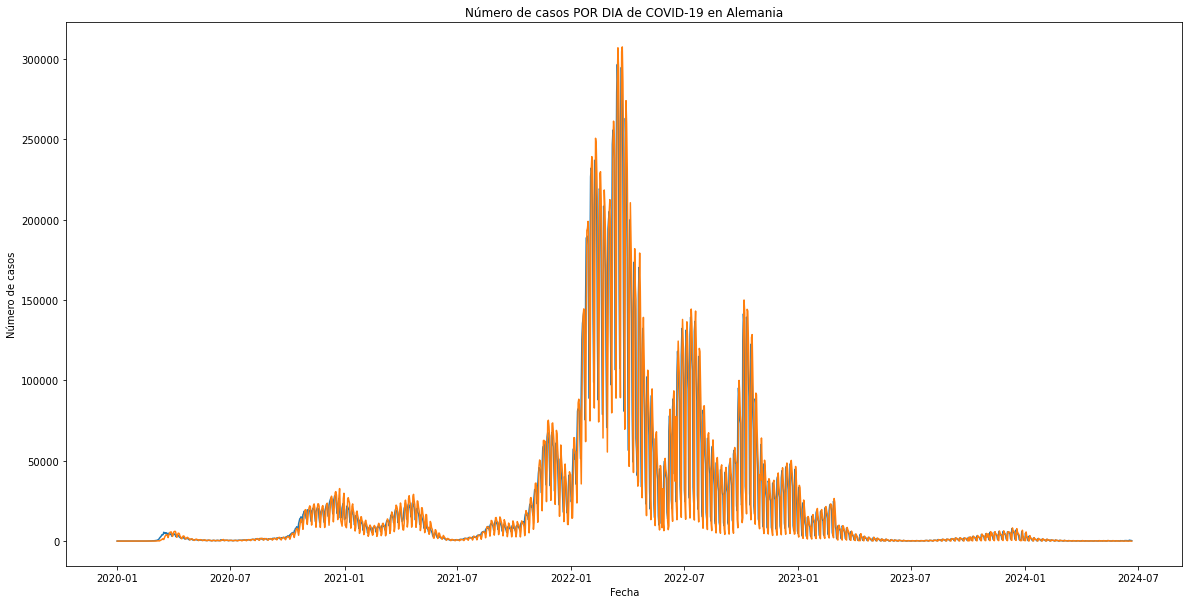

In [92]:
plt.figure(figsize=(20, 10))
plt.plot(unique_days, cases_by_date, label='Número de casos')
plt.plot(unique_days, recovering_by_date, label='Número de recuperaciones')
plt.title('Número de casos POR DIA de COVID-19 en Alemania')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

# **1)Graficas por dia :**

## 1.1)Numero de casos

Estoy graficando el numero de casos o Anzahfall por dia, agrupe por fecha y sume los valores de 'Número de casos', creo que eso me da el numero de infectados por dia. Sin embargo, ne me dio la misma grafica que el articulo, el orden de los infectados es mucho mayor en esa.

Text(0, 0.5, 'Número de casos')

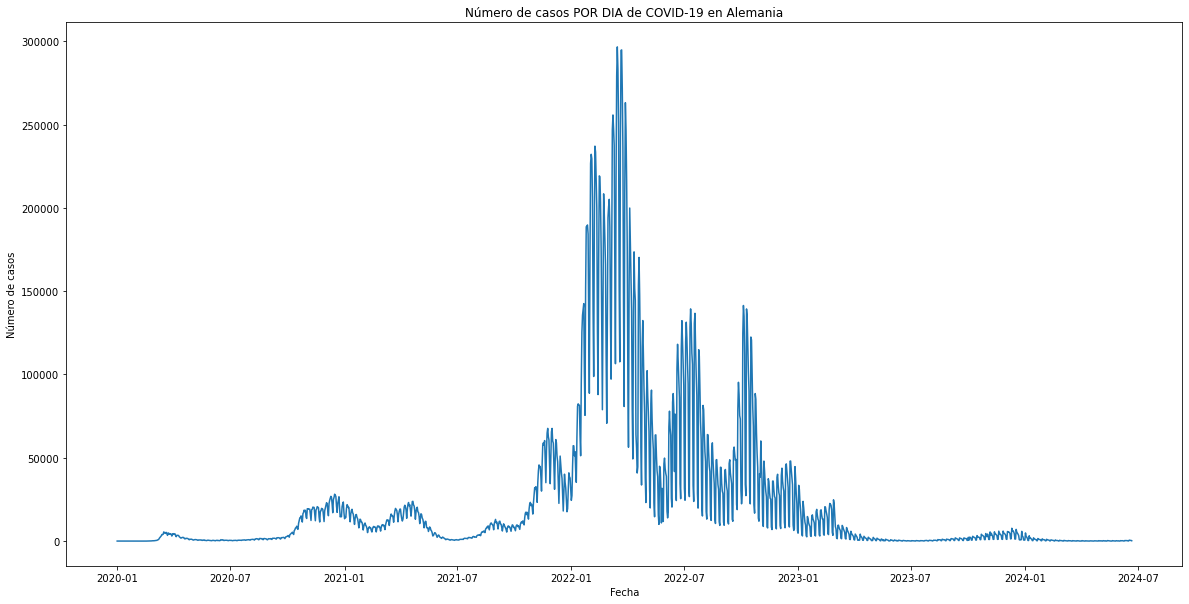

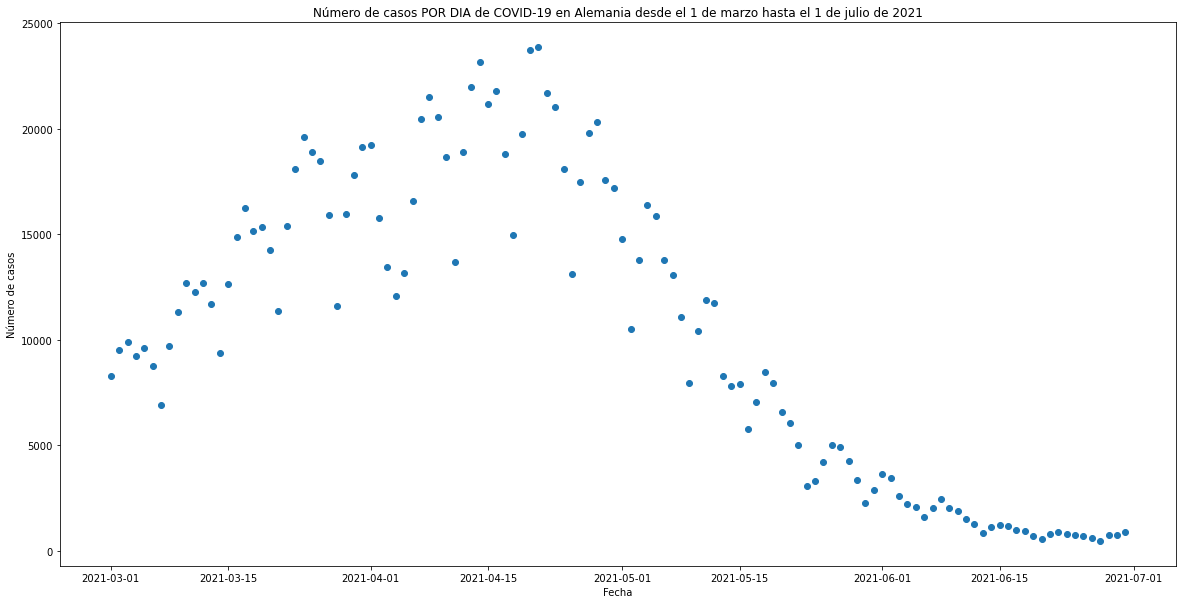

In [93]:
plt.figure(figsize=(20, 10))
plt.plot(unique_days, cases_by_date)
plt.title('Número de casos POR DIA de COVID-19 en Alemania')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

plt.figure(figsize=(20, 10))
plt.scatter(unique_days[start:end], cases_by_date[start:end])
plt.title('Número de casos POR DIA de COVID-19 en Alemania desde el 1 de marzo hasta el 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

A modo de verificacion se supone que el numeor de infectados va a llegar a un punto donde no aumente mas, para eso usamos el cumulative_sum

Text(0, 0.5, 'Número de casos')

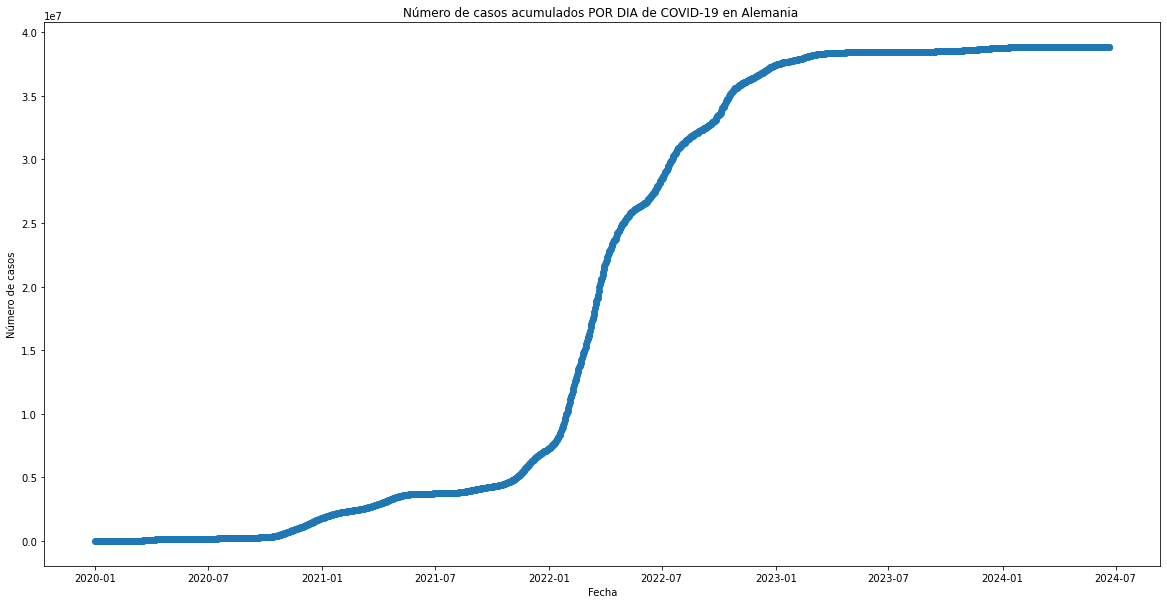

In [94]:
plt.figure(figsize=(20, 10))
plt.scatter(unique_days, cumulative_sum)
plt.title('Número de casos acumulados POR DIA de COVID-19 en Alemania ')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

## 1.2)Los removidos R: acumulalo, esta bien
R=R_rec+Death

Text(0, 0.5, 'Número de casos')

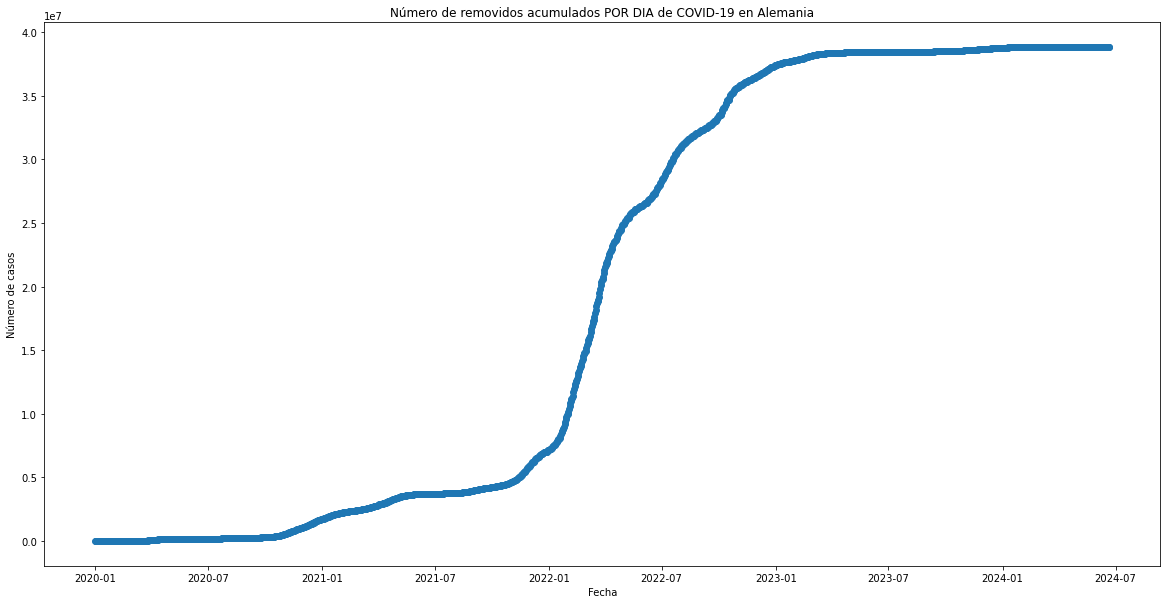

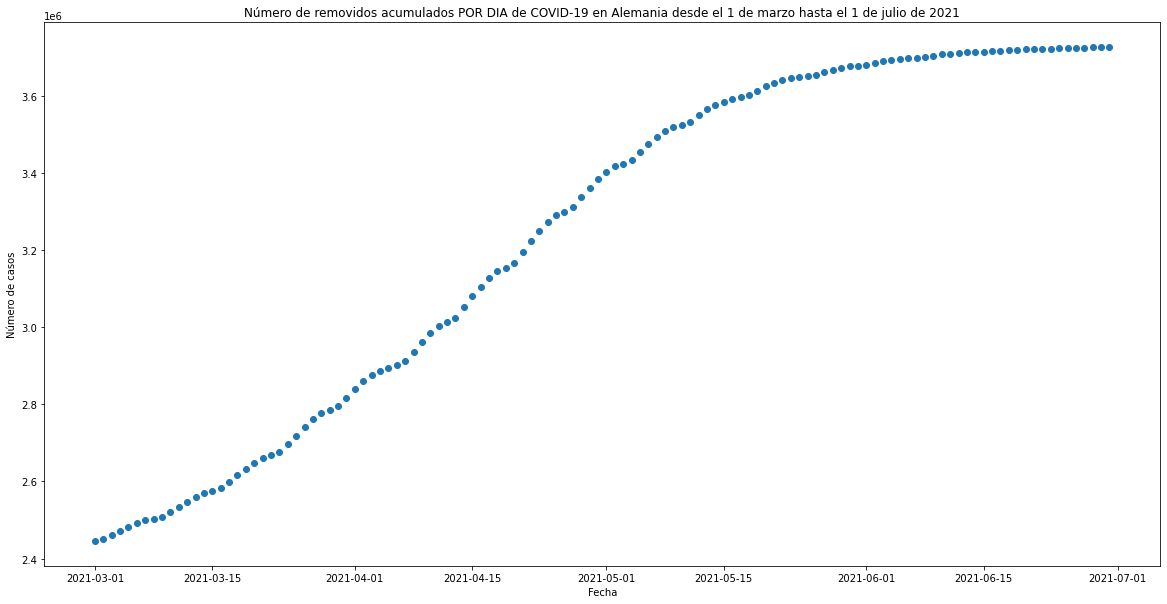

In [95]:

plt.figure(figsize=(20, 10))
plt.scatter(unique_days, cumulative_removing_by_date)
plt.title('Número de removidos acumulados POR DIA de COVID-19 en Alemania')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

plt.figure(figsize=(20, 10))
plt.scatter(unique_days[start:end], cumulative_removing_by_date[start:end])
plt.title('Número de removidos acumulados POR DIA de COVID-19 en Alemania desde el 1 de marzo hasta el 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

## 1.3)Los Infectados:I=Ic-R *

In [96]:
#Numero de recuperaciones por dia
recovering_by_date = data.groupby('Fecha de referencia')['Número de recuperaciones'].sum().to_numpy()

#Numero de muertos por dia
deaths_by_date = data.groupby('Fecha de referencia')['Número de muertes'].sum().to_numpy()
print(recovering_by_date)
print(deaths_by_date)

#Numero de removidos por dia
removing_by_date = deaths_by_date + recovering_by_date
cumulative_removing_by_date = np.cumsum(removing_by_date)

print("hpña")
print(cumulative_removing_by_date)

#numero de casos por dia ESTE ESTA BIEN
cases_by_date = data.groupby('Fecha de referencia')['Número de casos'].sum().to_numpy()
print(len(cases_by_date))

#Numero de casos por dia acumulados 
cumulative_sum = np.cumsum(cases_by_date)
print(cumulative_sum)


[0 0 0 ... 9 5 2]
[0 0 0 ... 0 2 0]
hpña
[       0        0        0 ... 38835353 38835360 38835362]
1634
[      20       38       59 ... 38839770 38840164 38840361]


In [97]:
#nuero de muertos total
total_deaths = sum(deaths_by_date)
print('El numero de muertos totales',total_deaths)

#numero de recuperados total
total_recovered = sum(recovering_by_date)
print('El numero de recuperados totales',total_recovered)

#numero de infectados total
total_infected = sum(cases_by_date)
print('El numero de infectados totales',total_infected)

print('El numero de removidos es',total_recovered+total_deaths)

#lo anterior cuadra con lo real 

El numero de muertos totales 183322
El numero de recuperados totales 38652040
El numero de infectados totales 38840361
El numero de removidos es 38835362


En una fecha dada, el Ic deberia ser difrente al numero de removidosn acumulados hasta esa fecha

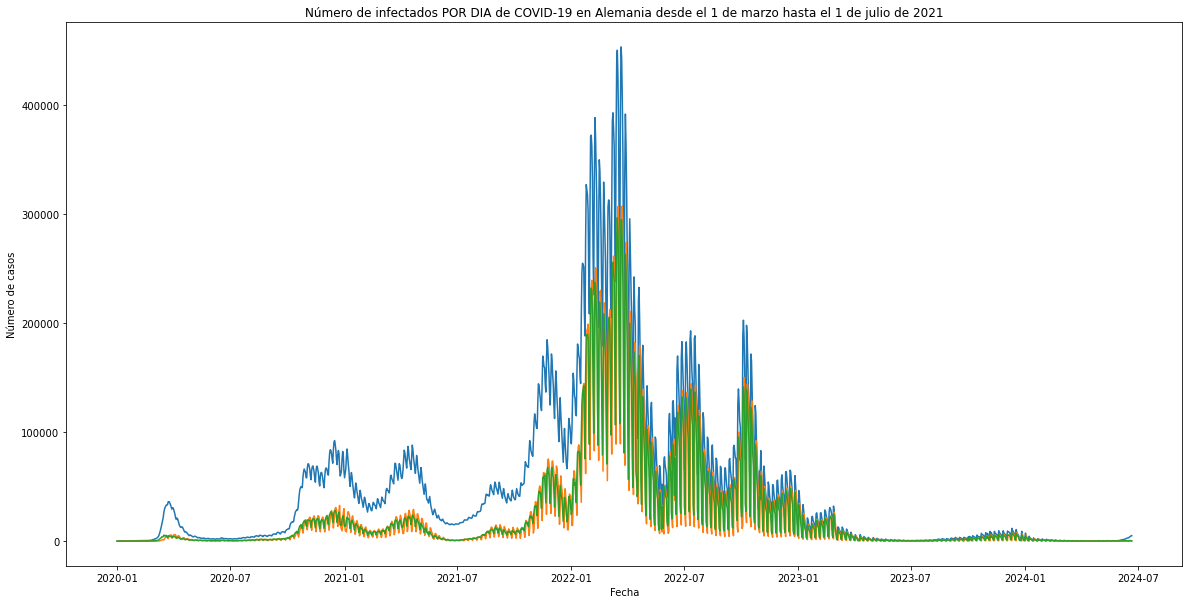

Text(0, 0.5, 'Número de casos')

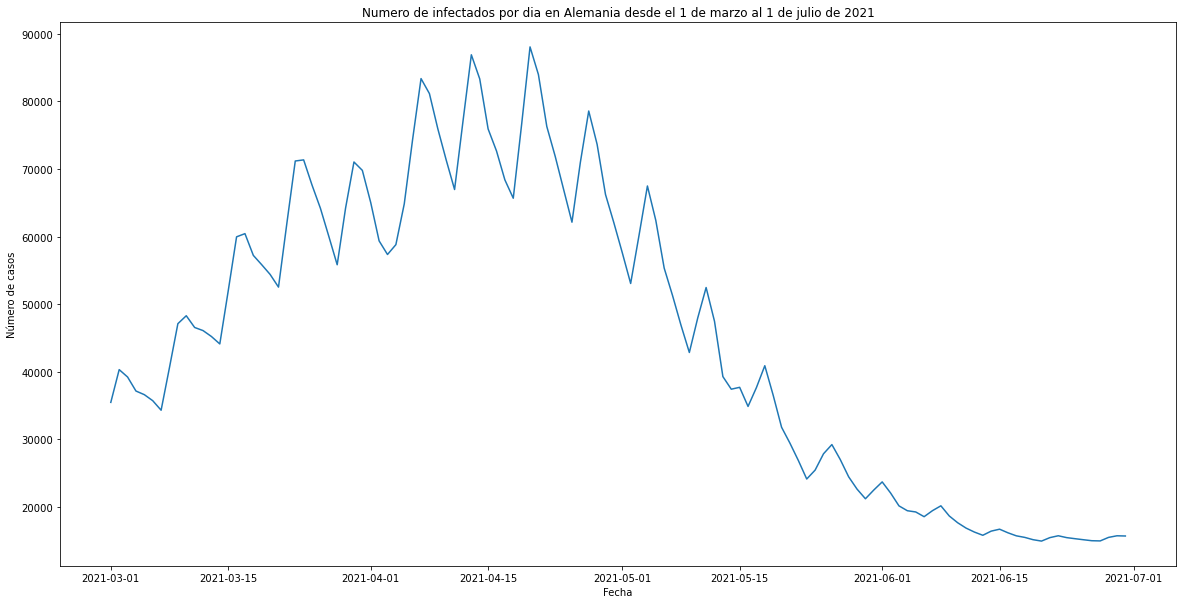

In [98]:

infected_by_date = cumulative_sum - cumulative_removing_by_date

plt.figure(figsize=(20, 10))
plt.plot(unique_days, infected_by_date)
plt.plot(unique_days, recovering_by_date)
plt.plot(unique_days, cases_by_date)
plt.title('Número de infectados POR DIA de COVID-19 en Alemania desde el 1 de marzo hasta el 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(unique_days[start:end], infected_by_date[start:end])
plt.title('Numero de infectados por dia en Alemania desde el 1 de marzo al 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

## 1.3)Los suceptibles S: Acumulados, estan bien 
S=N-I-R 

 =N-Ic+R-R=N-Ic

Text(0, 0.5, 'Número de casos')

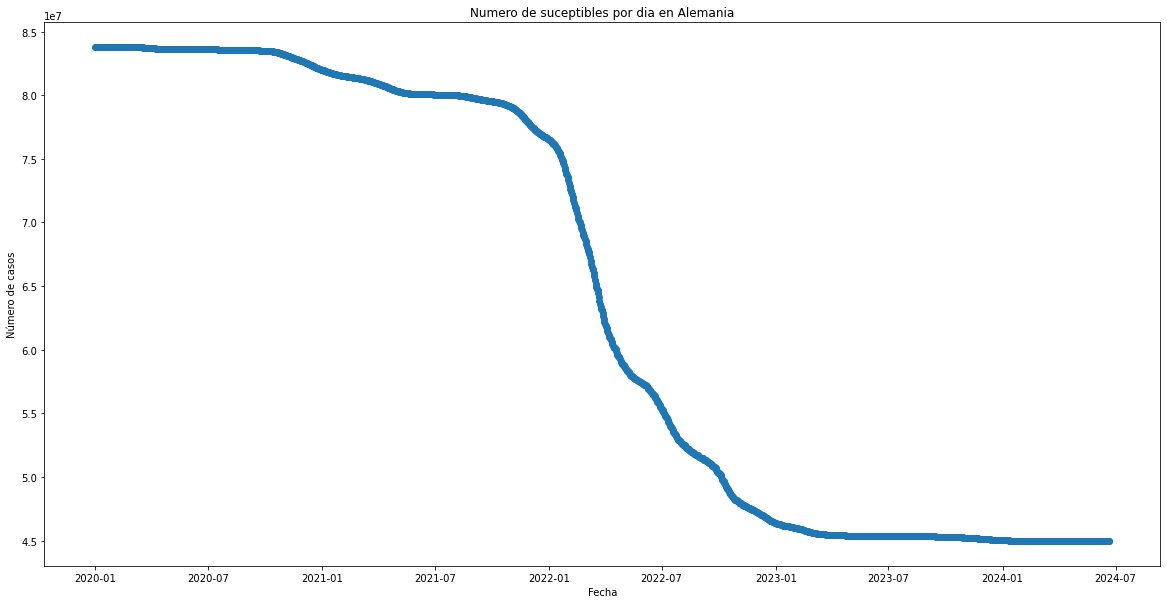

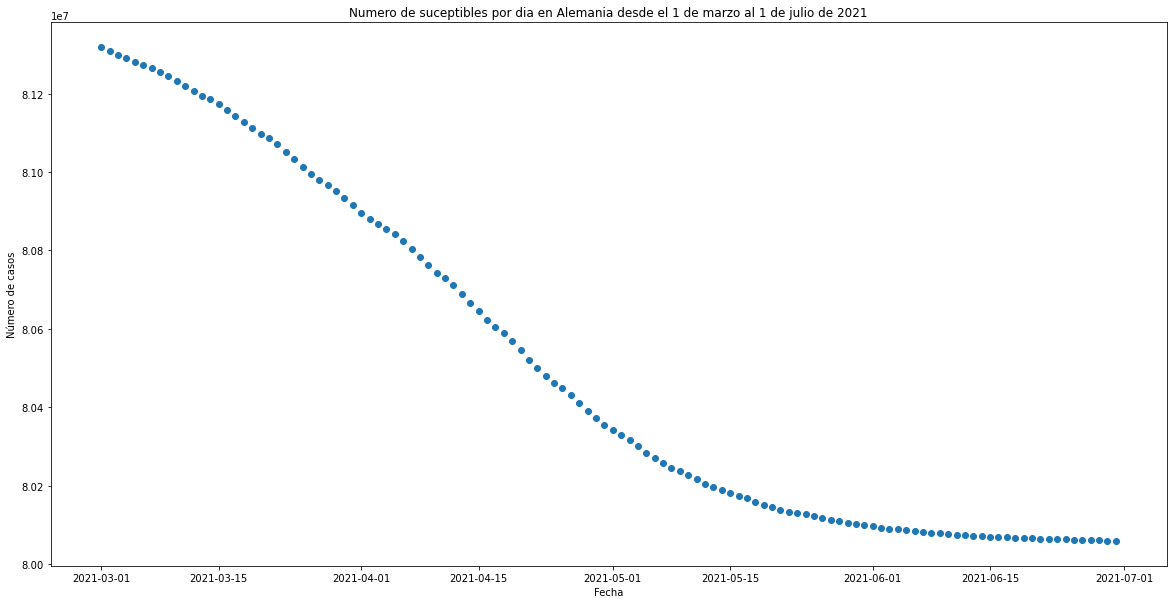

In [99]:

plt.figure(figsize=(20, 10))
plt.scatter(unique_days, susceptible_by_date, label='Susceptibles')
plt.title('Numero de suceptibles por dia en Alemania')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

plt.figure(figsize=(20, 10))
plt.scatter(unique_days[start:end], susceptible_by_date[start:end], label='Susceptibles')
plt.title('Numero de suceptibles por dia en Alemania desde el 1 de marzo al 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

### **Las graficas pero por semana: Sabemos que estos estan correctos al comparar con** https://data.who.int/dashboards/covid19/cases?m49=276&n=c


234


Text(0, 0.5, 'Número de casos')

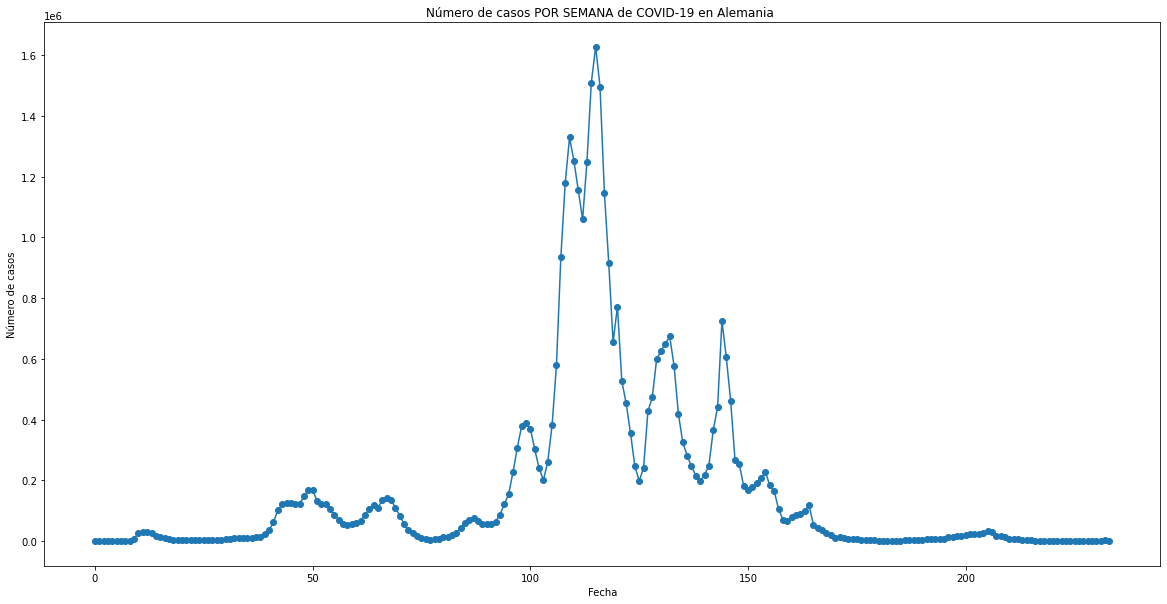

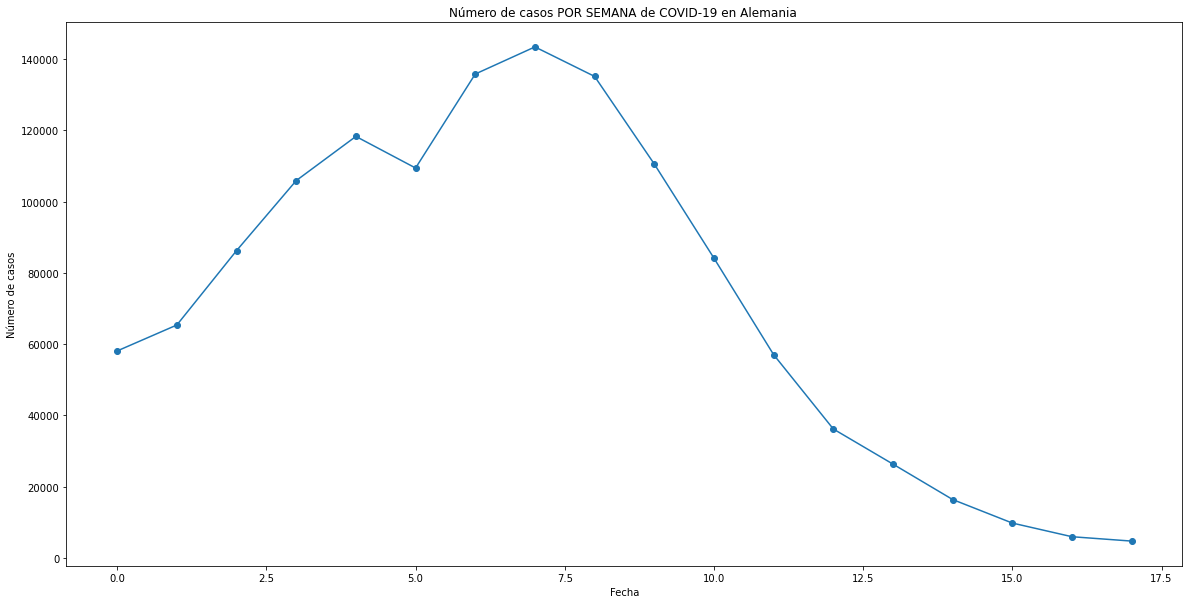

In [100]:
sum_each_7_days = [sum(cases_by_date[i:i+7]) for i in range(0, len(cases_by_date), 7)]
print(len(sum_each_7_days))

plt.figure(figsize=(20, 10))
plt.plot(sum_each_7_days, marker='o')
plt.title('Número de casos POR SEMANA de COVID-19 en Alemania ')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

plt.figure(figsize=(20, 10))
plt.plot(sum_each_7_days[60:78], marker='o')# los indices los saque de manera rapida teniendo en cuenta las semanas de los 1524 dias
plt.title('Número de casos POR SEMANA de COVID-19 en Alemania ')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

## Datos suavizados

In [101]:
# Suavisando los datos: se toma el promedio de los 3 días anteriores, los 3 días posteriores y el día actual
susceptible = [np.mean(susceptible_by_date[i-7:i+7]) for i in range(start, end)]
removing = [np.mean(cumulative_removing_by_date[i-7:i+7]) for i in range(start, end)]
#infected = [np.mean(cases_by_date[i-3:i+3]) for i in range(march_1_index, july_1_index)]
infected = [np.mean(infected_by_date[i-7:i+7]) for i in range(start, end)]
print(len(susceptible), len(removing), len(infected)) # Deben ser iguales

days = np.arange(end - start)
print(days)

122 122 122
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121]


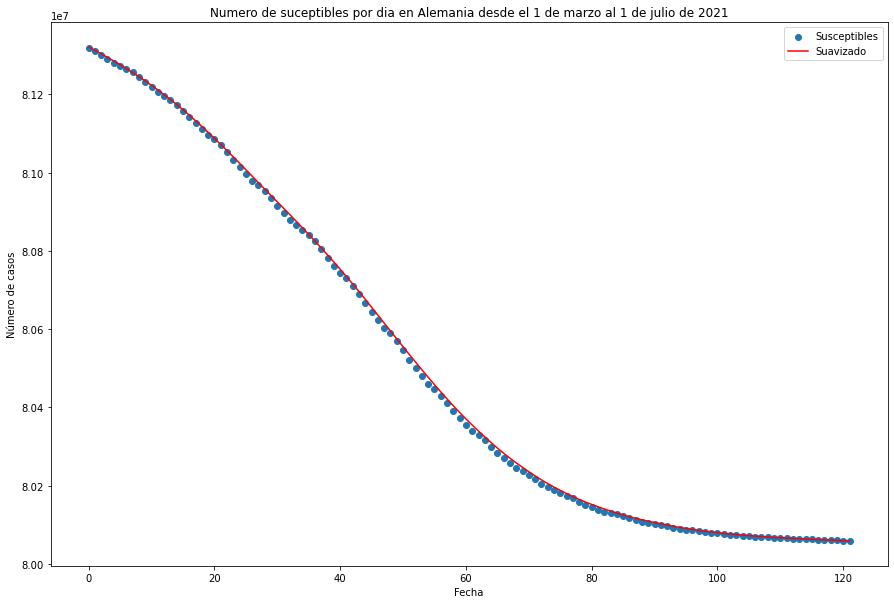

In [102]:
# Plotting the data
# susceptible = S
plt.figure(figsize=(15, 10))
plt.scatter(days, susceptible_by_date[start:end], label='Susceptibles')
plt.plot(days, susceptible, label='Suavizado', color='red')
plt.title('Numero de suceptibles por dia en Alemania desde el 1 de marzo al 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()

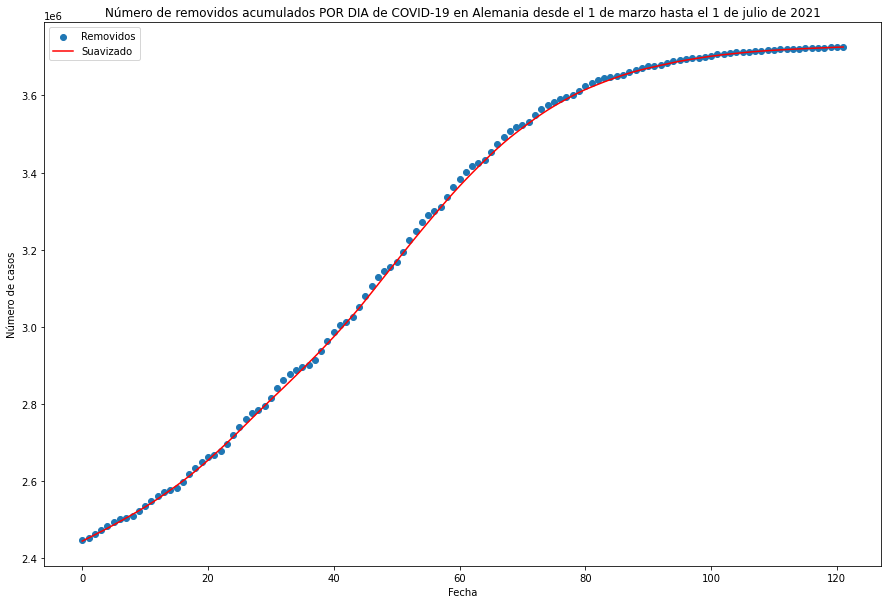

In [103]:
plt.figure(figsize=(15, 10))
plt.scatter(days, cumulative_removing_by_date[start:end], label='Removidos')
plt.plot(days, removing, color='red', label='Suavizado')
plt.title('Número de removidos acumulados POR DIA de COVID-19 en Alemania desde el 1 de marzo hasta el 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()

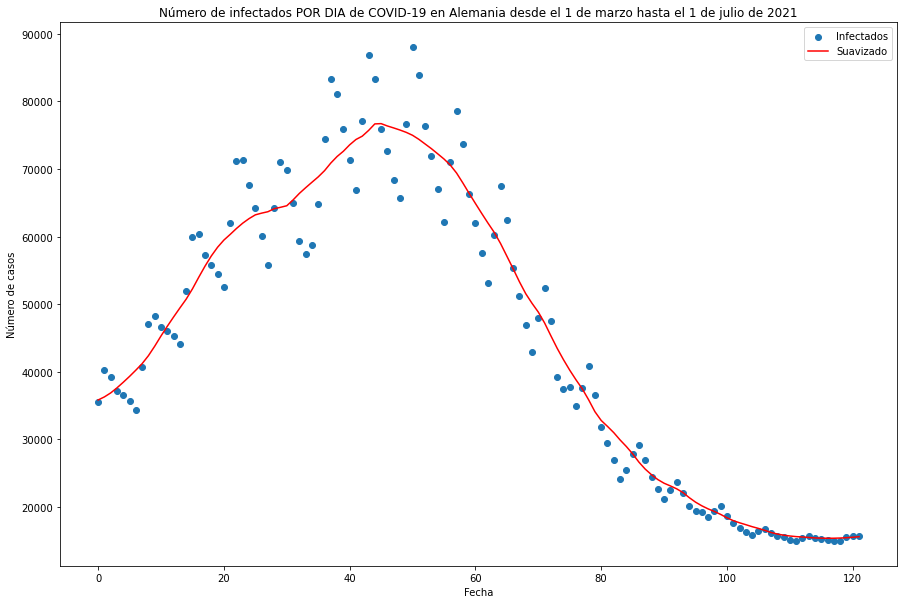

In [104]:
plt.figure(figsize=(15, 10))
plt.scatter(days, infected_by_date[start:end], label='Infectados')
plt.plot(days, infected, color='red', label='Suavizado')
#plt.plot(days, cases_by_date[start:end], label='casos por dia', color='green') #TODO: Revisar, al parecer son los mismos datos
plt.title('Número de infectados POR DIA de COVID-19 en Alemania desde el 1 de marzo hasta el 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()

#! Aunque se realizó el suavizado, los datos aun no coinciden con los del paper

# imprimir a csv

In [105]:
# Crear un DataFrame con los datos suavizados con t como índice
Al_SIR = pd.DataFrame({'t': days, 'S': susceptible, 'I': infected, 'R': removing})
Al_SIR.set_index('t', inplace=True)

# Normalizar los datos (opcional)
#* Al_SIR = Al_SIR / population

# Guardar los datos en un archivo CSV
Al_SIR.to_csv('Al_SIR.csv')

Al_SIR

,S,I,R
t,,,
0,8.132095e+07,35839.571429,2.443214e+06
1,8.131229e+07,36296.071429,2.451412e+06
2,8.130347e+07,36885.428571,2.459642e+06
3,8.129440e+07,37633.357143,2.467969e+06
4,8.128505e+07,38460.428571,2.476488e+06
...,...,...,...
117,8.006142e+07,15404.785714,3.723175e+06
118,8.006071e+07,15432.357143,3.723857e+06
119,8.006000e+07,15482.000000,3.724522e+06
